In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_UCI.csv to diabetes_UCI.csv


# DataSet

In [3]:
df=pd.read_csv('diabetes_UCI.csv')
print(df.columns.values)
print('df = ',df)
print('df_Info =',df.info())
df=df.reset_index()
df.drop(['index'],axis='columns',inplace=True)
YRdf=pd.DataFrame(df['Outcome'])
YR=np.array(YRdf).ravel()
print('np.uniqur(YR)',np.unique(YR))
xdf=df.copy()
xdf.drop(['Outcome'],axis='columns',inplace=True)
print('hey',xdf)
K=int(np.max(YR))
X=np.array(xdf)



['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']
df =       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31       

In [4]:
xdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Text(0.5, 0, 'pregnencies')

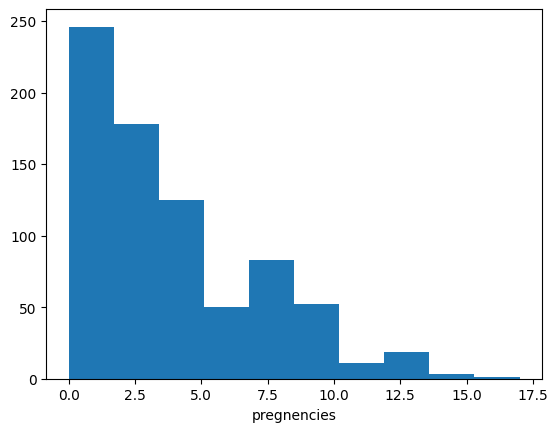

In [5]:
plt.hist(X[:,0])
plt.xlabel('pregnencies')

Text(0.5, 0, 'Glucose')

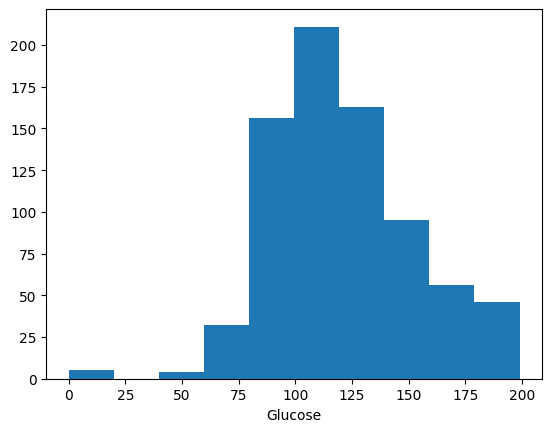

In [6]:
plt.hist(X[:,1])
plt.xlabel('Glucose')

In [7]:
Glucose_no_d= X[np.where(YR==0),1]
Glucose_d= X[np.where(YR==1),1]

In [8]:
Glucose_no_d= np.reshape(Glucose_no_d,(-1,1))
Glucose_d=np.reshape(Glucose_d,(-1,1))

Text(0.5, 0, 'Glucose /no diabete')

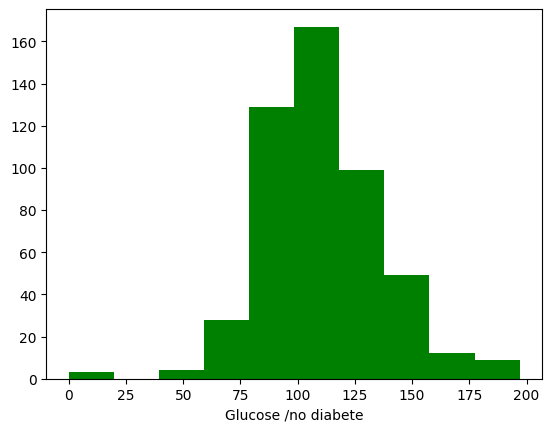

In [9]:
plt.hist(Glucose_no_d[:,0],color='green',label='no diabete')
plt.xlabel('Glucose /no diabete')

Text(0.5, 0, 'Glucose /diabete')

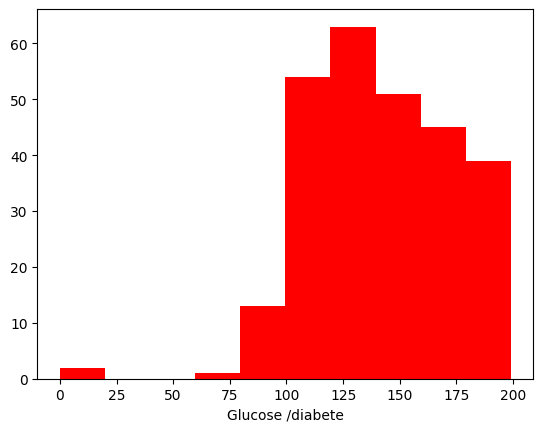

In [10]:
plt.hist(Glucose_d[:,0],color='red',label=' diabete')
plt.xlabel('Glucose /diabete')

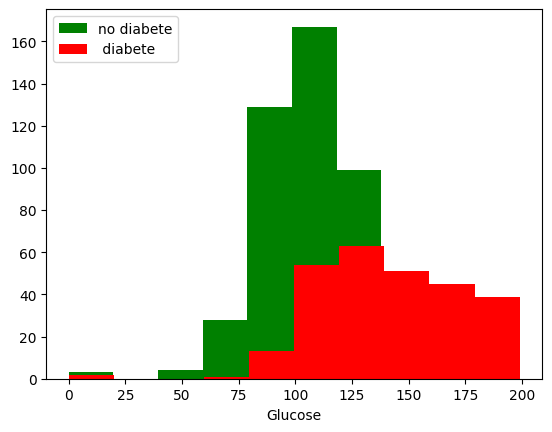

In [11]:
plt.hist(Glucose_no_d[:,0],color='green',label='no diabete')
plt.hist(Glucose_d[:,0],color='red',label=' diabete')
plt.legend(loc='upper left')
plt.xlabel('Glucose')
plt.show()

#Lasso

In [12]:
X.shape[0]

768

In [13]:
test_size=268/X.shape[0]
x_train,x_test,y_train,y_test=train_test_split(X,YR,test_size=test_size)

In [14]:
y_test.shape

(268,)

In [15]:
LR=LogisticRegression(max_iter=1000).fit(x_train,y_train)
LR.score(x_train,y_train)
LR.score(x_train,y_train)

0.792

In [16]:
scores=cross_val_score(LR,X,YR,cv=20)

In [17]:
LR=LogisticRegression(max_iter=1000)
cv=np.arange(5,30,1)
for i in cv:
  scores=cross_val_score(LR,X,YR,cv=i)
  print('mean with cv={i}: {np.mean{ ',scores,'}}')

mean with cv={i}: {np.mean{  [0.77272727 0.74675325 0.75324675 0.81045752 0.77777778] }}
mean with cv={i}: {np.mean{  [0.78125   0.7578125 0.7578125 0.765625  0.796875  0.796875 ] }}
mean with cv={i}: {np.mean{  [0.74545455 0.8        0.71818182 0.79090909 0.76363636 0.81651376
 0.78899083] }}
mean with cv={i}: {np.mean{  [0.73958333 0.8125     0.70833333 0.75       0.78125    0.76041667
 0.82291667 0.80208333] }}
mean with cv={i}: {np.mean{  [0.72093023 0.80232558 0.75581395 0.70588235 0.81176471 0.71764706
 0.81176471 0.76470588 0.82352941] }}
mean with cv={i}: {np.mean{  [0.72727273 0.77922078 0.80519481 0.71428571 0.75324675 0.76623377
 0.80519481 0.80519481 0.75       0.82894737] }}
mean with cv={i}: {np.mean{  [0.7        0.81428571 0.78571429 0.74285714 0.74285714 0.78571429
 0.71428571 0.78571429 0.84285714 0.76811594 0.82608696] }}
mean with cv={i}: {np.mean{  [0.6875   0.8125   0.8125   0.75     0.6875   0.78125  0.8125   0.75
 0.765625 0.84375  0.765625 0.828125] }}
mean wit

In [18]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Paramètre de régularisation lambda
lambda_ = 0.01

# Création du modèle de régression logistique avec pénalité L1 (Lasso)
LR_Lasso = LogisticRegression(penalty='l1', solver='saga', C=lambda_, max_iter=100)

# Entraînement du modèle sur les données d'entraînement
LR_Lasso.fit(x_train, y_train, sample_weight=None)

# Création d'une liste d'alphas pour tester différentes valeurs de régularisation
alphas = np.arange(10e-6, 10e-3, 10e-6)

# Initialisation d'un tableau pour stocker les résultats
res = np.zeros((alphas.shape[0], 8))
acc=np.zeros((alphas.shape[0]))
# Boucle sur les différentes valeurs d'alpha
for i, alpha in enumerate(alphas):
    # Création du modèle de régression logistique avec pénalité L1 (Lasso) et le nouvel alpha
    LR_Lasso = LogisticRegression(penalty='l1', solver='saga', C=alpha, max_iter=1000).fit(x_train, y_train, sample_weight=None)
    acc = LR_Lasso.score(x_train, y_train)
    for j,coeff in enumerate(LR_Lasso.coef_.ravel()):
      res[i,j] =coeff




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

<Figure size 2280x1080 with 0 Axes>

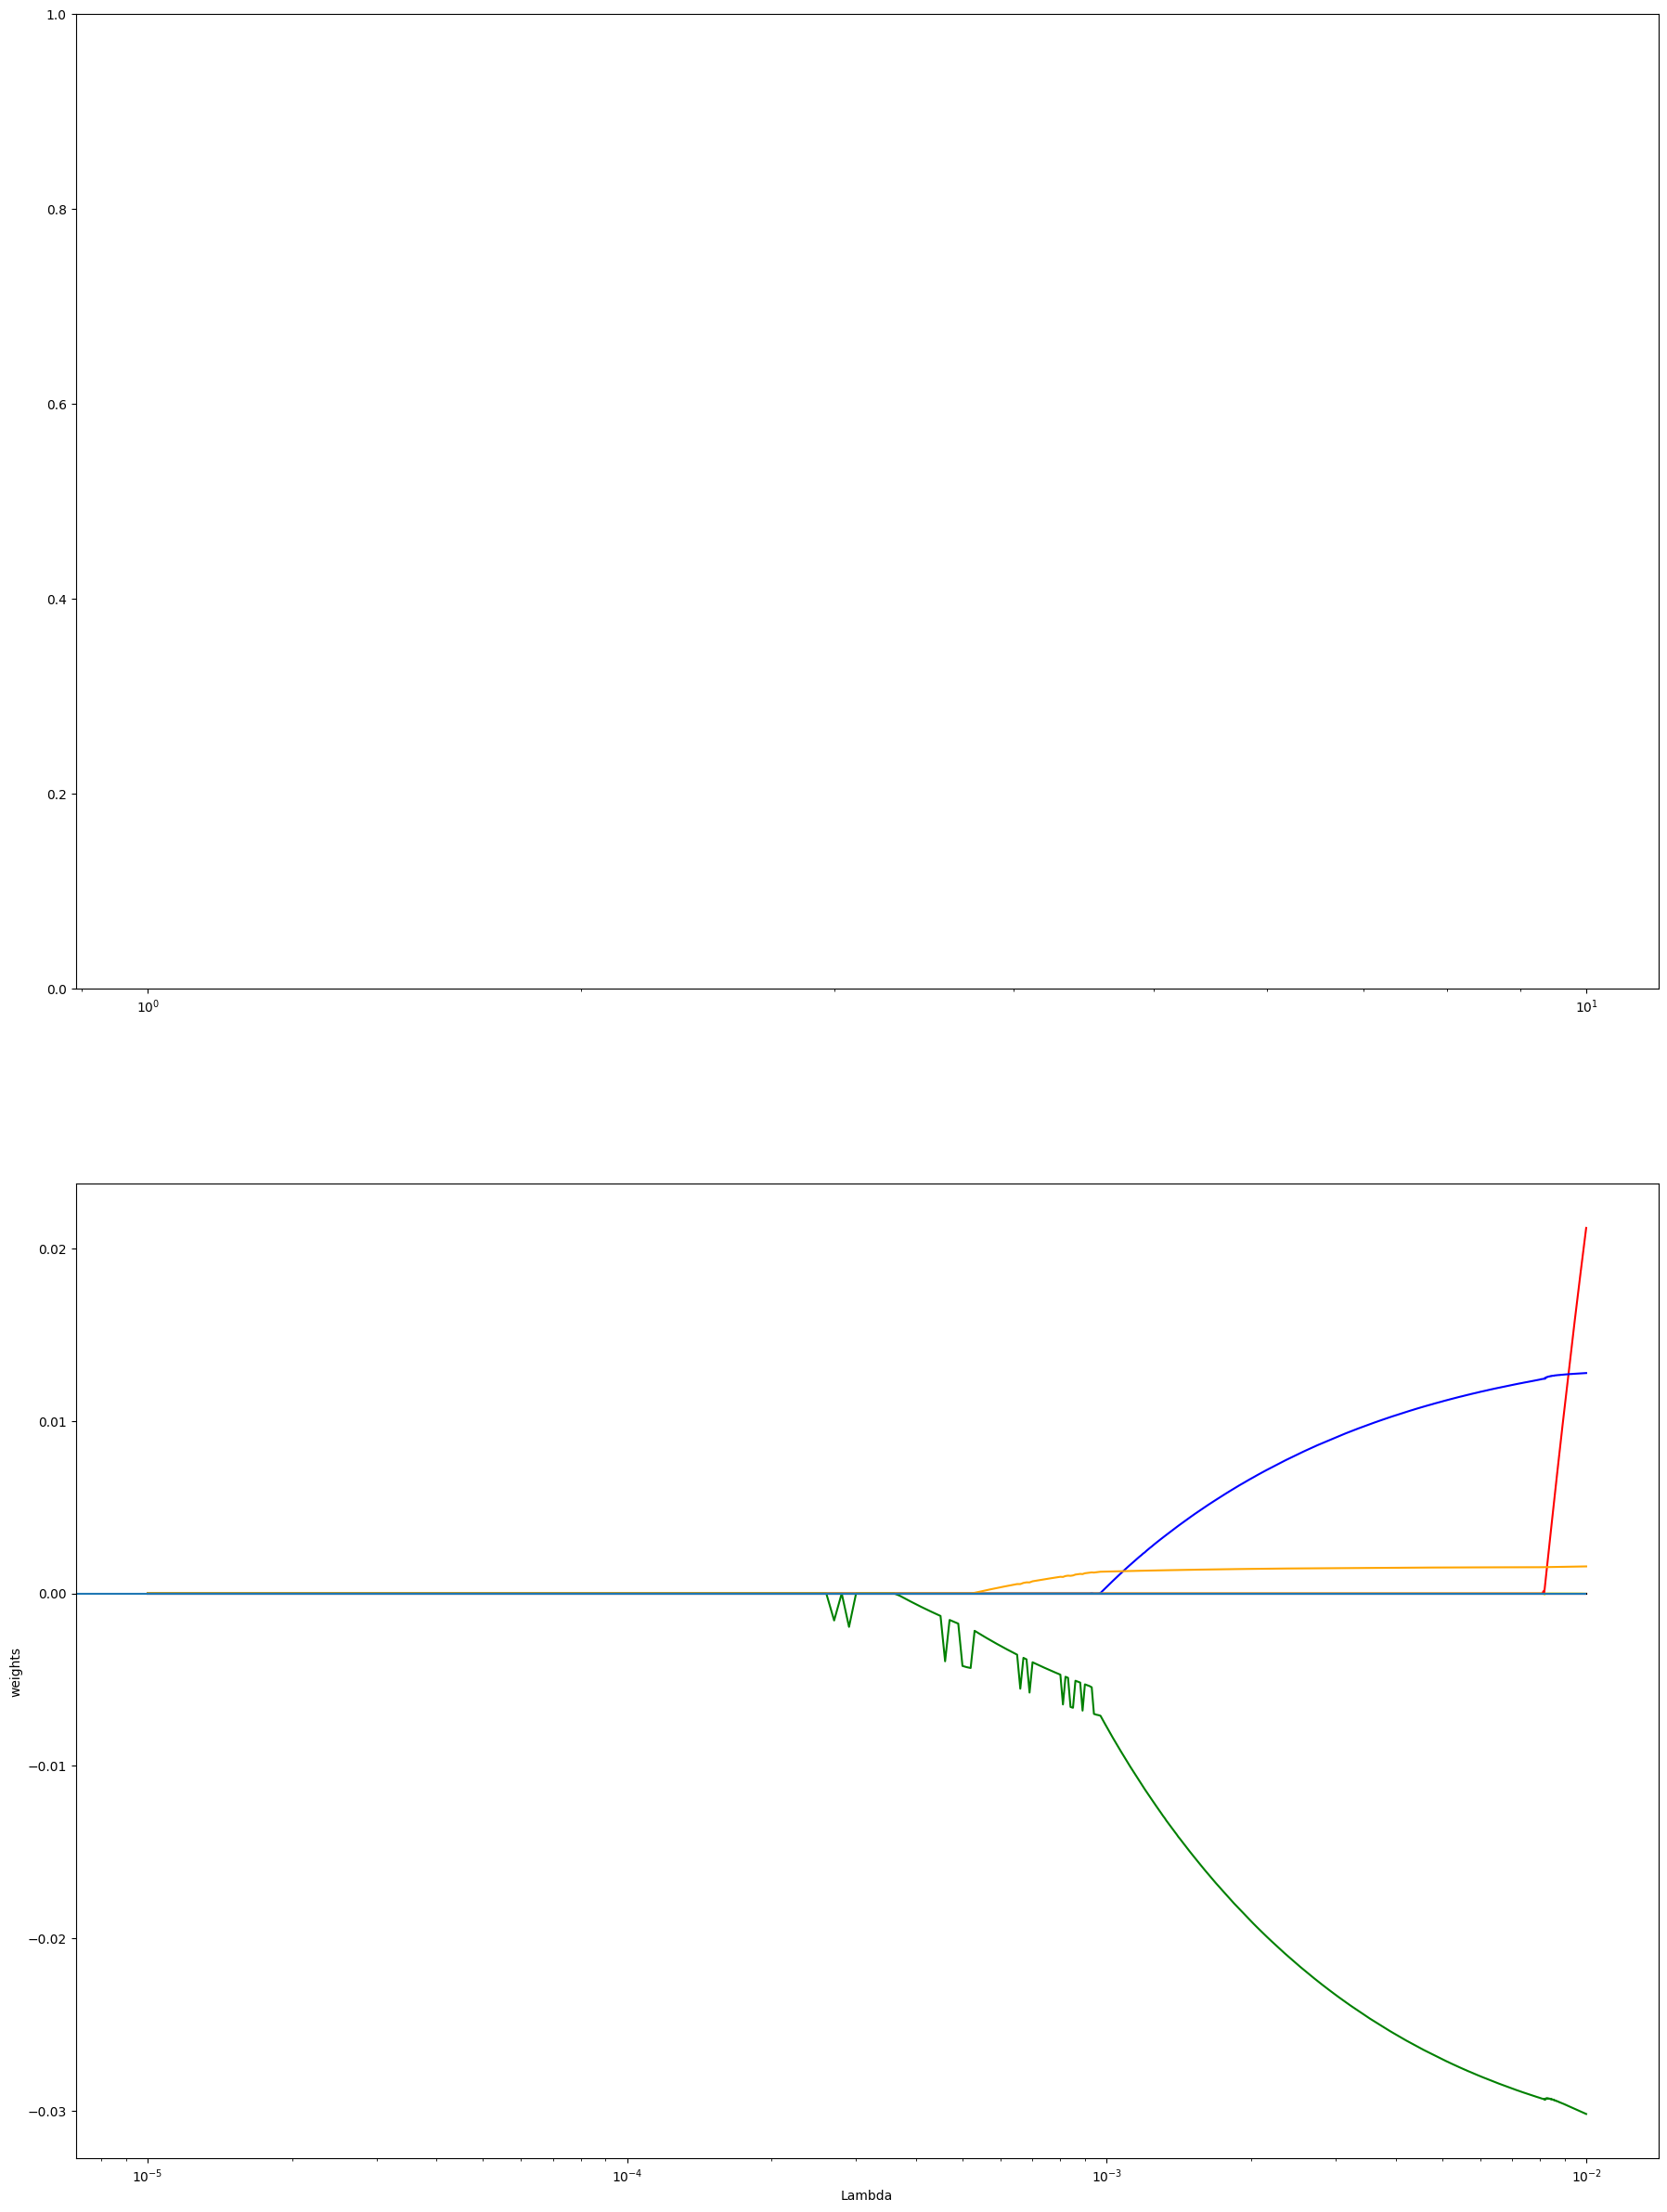

In [19]:
plt.figure(figsize=(19,9),dpi=120)
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(22,30))
ax2.plot(alphas,res[:,0],color='red',label='weight 1')
ax2.plot(alphas,res[:,1],color='blue',label='weight 2')
ax2.plot(alphas,res[:,2],color='green',label='weight 3')
ax2.plot(alphas,res[:,3],color='yellow',label='weight 4')
ax2.plot(alphas,res[:,4],color='orange',label='weight 5')
ax2.plot(alphas,res[:,5],color='purple',label='weight 6')
ax2.plot(alphas,res[:,6],color='pink',label='weight 7')
ax2.plot(alphas,res[:,7],color='black',label='weight 8')
ax2.set(xlabel='Lambda',ylabel='weights')
ax2.set_xscale('log')
ax1.set_xscale('log')
ax2.hlines(y=0,xmin=0,xmax=10e-3)


In [ ]:
y_pred =LR_Lasso.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[140  21]
 [ 70  37]]


0.6604477611940298

#SVM

In [ ]:
from sklearn import svm
SVM=svm.SVC(kernel='linear')
test_size=268/X.shape[0]
X_train,X_test,y_train,y_test=train_test_split(X,YR,test_size=test_size)
SVM.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
SVM.score(X_train,y_train)

0.792

In [ ]:
SVM.score(X_test,y_test)

0.7611940298507462

In [ ]:
y_pred =SVM.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]

0.7611940298507462